In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('data_processed.csv')
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1215,2015-09-26 01:07:35,32,male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1216,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1217,2015-11-30 21:25:06,46,female,United States,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [3]:
data.drop(labels=['Timestamp'], axis=1, inplace=True)

label_encoder = LabelEncoder()
data['treatment'] = label_encoder.fit_transform(data['treatment'])

for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])
    
X = data.drop(columns=['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred_gb = best_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

accuracy_gb, random_search.best_params_

(0.7459016393442623,
 {'subsample': 0.8,
  'n_estimators': 300,
  'min_samples_split': 10,
  'max_depth': 3,
  'learning_rate': 0.01})

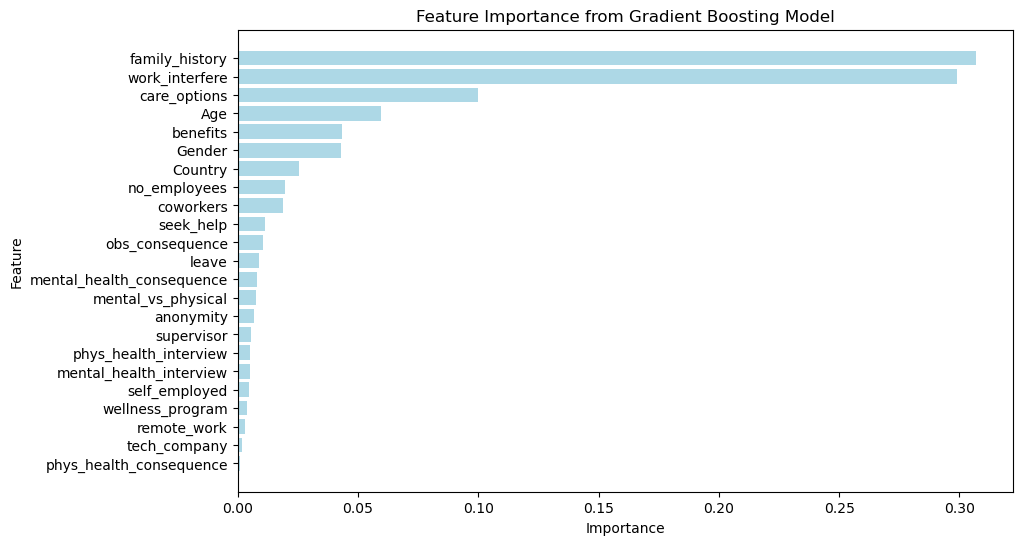

In [5]:
feature_importances_gb = best_model.feature_importances_

importance_df_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_gb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()  
plt.show()